## Observations and Insights
Following is an analysis of drug trial data from a study of 9 different cancer fighting drugs given to mice with tumors. The 1,893 tumor volume measurements collected in the study appear to be normally distributed and there are no outlier values. Overall, Ramicane appears to be the most effective treatment for reducing tumor volume over time, followed closely by Capomulin; however, it should be noted that more volume measurements were collected from the mice receiving Ramicane and Capomulin than the mice receiving other drugs or placebo. Mice treated with Ramicane and Capomulin comprise slightly more than 24% of all the measurements collected in the study. There is a positive correlation (0.84) between mouse weight and average tumor volume in the Capomulin sample. Six of the nine drugs used in the study proved more effective than placebo. Among four regimens of interest--Ramicane, Capomulin, Propriva, and Ceftamin--the median final volume is 45.0. The lower quartile of final volumes is: 37.3. The upper quartile of final volumes is: 58.5, and the IQR of final volumes is 21.2.

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
del merged['Age_months']
del merged['Metastatic Sites']
merged.head()

,Mouse ID,Drug Regimen,Sex,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,16,0,45.000000
1,k403,Ramicane,Male,16,5,38.825898
2,k403,Ramicane,Male,16,10,35.014271
3,k403,Ramicane,Male,16,15,34.223992
4,k403,Ramicane,Male,16,20,32.997729


In [4]:
merged.shape

(1893, 6)

In [5]:
vol_df = merged[['Drug Regimen', 'Tumor Volume (mm3)']]
vol_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


## Distribution of Tumor Volume Measurements 

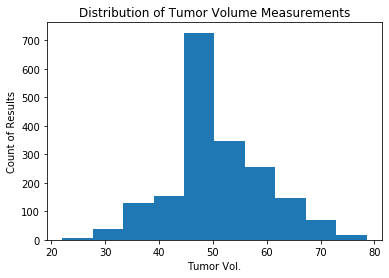

Z-score is 2.772162153833095. P-value is 0.250053326737509. P-value > 0.05 thus the data appear to be normally distributed.


In [6]:
plt.hist(merged['Tumor Volume (mm3)'])
plt.xlabel("Tumor Vol.")
plt.ylabel('Count of Results')
plt.title('Distribution of Tumor Volume Measurements')
plt.savefig('Plots/TumorVolDistribution.png')
plt.show()
norm_result = st.normaltest(merged['Tumor Volume (mm3)'].sample(150))
print(f'Z-score is {norm_result[0]}. P-value is {norm_result[1]}. P-value > 0.05 thus the data appear to be normally distributed.' )

In [7]:
vols_by_drug = vol_df.groupby('Drug Regimen')
mean = vols_by_drug.mean()
mean
mean = (round(mean, 2))
mean = mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, index={'Drug Regimen': 'Drug'})
mean.sort_values('Mean Tumor Volume')

,Mean Tumor Volume
Drug Regimen,
Ramicane,40.22
Capomulin,40.68
Propriva,52.32
Ceftamin,52.59
Infubinol,52.88
Zoniferol,53.24
Placebo,54.03
Stelasyn,54.23
Naftisol,54.33


In [8]:
median = vols_by_drug.median()
median
median = (round(median, 2))
median = median.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
median.sort_values('Median Tumor Volume')

,Median Tumor Volume
Drug Regimen,
Ramicane,40.67
Capomulin,41.56
Propriva,50.85
Ceftamin,51.78
Infubinol,51.82
Zoniferol,51.82
Placebo,52.29
Stelasyn,52.43
Naftisol,52.51


In [9]:
var = vols_by_drug.var()
var
var = (round(var, 2))
var = var.rename(columns = {'Tumor Volume (mm3)': 'Variance'})
var

,Variance
Drug Regimen,
Capomulin,24.95
Ceftamin,39.29
Infubinol,43.13
Ketapril,68.55
Naftisol,66.17
Placebo,61.17
Propriva,42.35
Ramicane,23.49
Stelasyn,59.45


In [10]:
std = vols_by_drug.std()
std
std = (round(std, 2))
std = std.rename(columns={'Tumor Volume (mm3)': 'Standard Deviation'})
std

,Standard Deviation
Drug Regimen,
Capomulin,4.99
Ceftamin,6.27
Infubinol,6.57
Ketapril,8.28
Naftisol,8.13
Placebo,7.82
Propriva,6.51
Ramicane,4.85
Stelasyn,7.71


In [11]:
sems = vols_by_drug.sem()
sems
sems = (round(sems, 2))
sems

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60
Placebo,0.58
Propriva,0.51
Ramicane,0.32
Stelasyn,0.57


In [12]:
summary_df = pd.merge(mean, median, on="Drug Regimen", how='outer')
summary_df

,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.68,41.56
Ceftamin,52.59,51.78
Infubinol,52.88,51.82
Ketapril,55.24,53.70
Naftisol,54.33,52.51
Placebo,54.03,52.29
Propriva,52.32,50.85
Ramicane,40.22,40.67
Stelasyn,54.23,52.43


In [13]:
summary_df = pd.merge(summary_df, var, on='Drug Regimen', how='outer')
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance
Drug Regimen,,,
Capomulin,40.68,41.56,24.95
Ceftamin,52.59,51.78,39.29
Infubinol,52.88,51.82,43.13
Ketapril,55.24,53.70,68.55
Naftisol,54.33,52.51,66.17
Placebo,54.03,52.29,61.17
Propriva,52.32,50.85,42.35
Ramicane,40.22,40.67,23.49
Stelasyn,54.23,52.43,59.45


In [14]:
summary_df = pd.merge(summary_df, std, on='Drug Regimen', how='outer')
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13
Placebo,54.03,52.29,61.17,7.82
Propriva,52.32,50.85,42.35,6.51
Ramicane,40.22,40.67,23.49,4.85
Stelasyn,54.23,52.43,59.45,7.71


## Summary statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.merge(summary_df, sems, on='Drug Regimen', how='outer')
summary_df
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)': 'SEM'})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [16]:
merged_grouped = merged.groupby('Drug Regimen')
data_point_count = merged_grouped.count()
data_point_count

,Mouse ID,Sex,Weight (g),Timepoint,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,230,230,230,230,230
Ceftamin,178,178,178,178,178
Infubinol,178,178,178,178,178
Ketapril,188,188,188,188,188
Naftisol,186,186,186,186,186
Placebo,181,181,181,181,181
Propriva,161,161,161,161,161
Ramicane,228,228,228,228,228
Stelasyn,181,181,181,181,181


In [17]:
# drug_names = merged['Drug Regimen'].unique()
# drug_names

In [18]:
# Capomulin_count = len(merged.loc[merged['Drug Regimen'] == 'Capomulin']) 
# Capomulin_count
# Ramicane_count = len(merged.loc[merged['Drug Regimen'] == 'Ramicane']) 
# Ramicane_count

## Bar plots

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points_per = data_point_count['Mouse ID']
data_points_per

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [20]:
pcnt_total_points = data_points_per/1893 * 100
pcnt_total_points

Drug Regimen
Capomulin    12.150026
Ceftamin      9.403064
Infubinol     9.403064
Ketapril      9.931326
Naftisol      9.825674
Placebo       9.561543
Propriva      8.505018
Ramicane     12.044374
Stelasyn      9.561543
Zoniferol     9.614369
Name: Mouse ID, dtype: float64

## Pandas Bar Plot

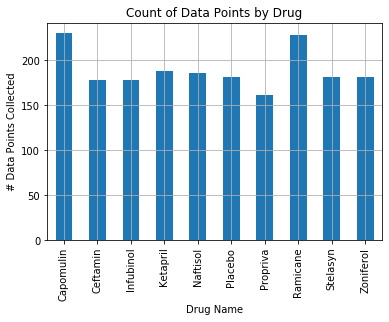

In [21]:
data_points_per = data_points_per.rename(columns={'Mouse ID': 'Count of Data Points'})
data_points_per
ax = data_points_per.plot(kind='bar', grid=True, title='Count of Data Points by Drug')
ax.set_xlabel('Drug Name')
ax.set_ylabel('# Data Points Collected')
plt.savefig('Plots/DataPtCountPandas.png')
plt.show()

## Matplotlib.pyplot Bar Plot

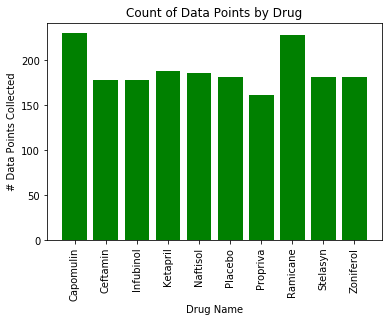

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points_per)) 
y_values = data_points_per
plt.bar(x_axis, y_values, align='center', color='g')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_points_per.index, rotation=90)
plt.title("Count of Data Points by Drug")
plt.xlabel('Drug Name')
plt.ylabel('# Data Points Collected')
plt.savefig('Plots/DataPtCountPyplt.png')

## Pie plots

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = merged[['Mouse ID', 'Sex']]
gender_data = gender_data.drop_duplicates(subset=['Mouse ID'])
gender_data

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


In [24]:
gender_count = gender_data.groupby('Sex')
gender_ratio = gender_count.count()
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_ratio_df = gender_ratio_df.rename(columns={'Mouse ID': 'Sex Count'})
gender_ratio_df

,Sex Count
Sex,
Female,124
Male,125


## Pandas Pie Chart 

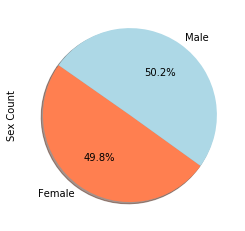

In [25]:
labels = gender_ratio_df.index
gender_ratio_df.plot(kind='pie', y='Sex Count', labels=labels, autopct = '%1.1f%%', startangle=145, shadow=True, legend=False, colors=['coral', 'lightblue'])
plt.savefig('Plots/GenderPiePandas.png')

## Matplotlib.pyplot Pie Chart 

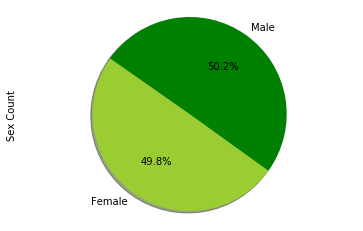

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
sex_count = [124, 125]
plt.pie(sex_count, labels=genders, shadow=True, colors=['yellowgreen', 'green'], startangle=145, autopct = '%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex Count')
plt.savefig('Plots/GenderPiePyplt.png')
plt.show()

## Quartiles, outliers and boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merged_bestfinalvol = merged.loc[(merged["Drug Regimen"] == 'Ramicane') | (merged["Drug Regimen"] =='Capomulin') | (merged["Drug Regimen"] == 'Propriva') | (merged["Drug Regimen"] == 'Ceftamin')] 
merged_bestfinalvol

,Mouse ID,Drug Regimen,Sex,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,16,0,45.000000
1,k403,Ramicane,Male,16,5,38.825898
2,k403,Ramicane,Male,16,10,35.014271
3,k403,Ramicane,Male,16,15,34.223992
4,k403,Ramicane,Male,16,20,32.997729
...,...,...,...,...,...,...
1854,y865,Ceftamin,Male,26,40,63.469549
1855,y865,Ceftamin,Male,26,45,64.729837
1860,z435,Propriva,Female,26,0,45.000000
1861,z435,Propriva,Female,26,5,47.115980


## Final tumor volume readings for each mouse in selected drug trials (Capomulin, Ramicane, Ceftamin,  Propriva)

In [28]:
grouped = merged_bestfinalvol.groupby('Mouse ID')
final_vol = grouped['Timepoint'].max()
final_vol
last_readings = pd.merge(final_vol, merged_bestfinalvol, on=['Mouse ID', 'Timepoint'])
last_readings

,Mouse ID,Timepoint,Drug Regimen,Sex,Weight (g),Tumor Volume (mm3)
0,a275,45,Ceftamin,Female,28,62.999356
1,a411,45,Ramicane,Male,22,38.407618
2,a444,45,Ramicane,Female,25,43.047543
3,a520,45,Ramicane,Male,21,38.810366
4,a644,45,Ramicane,Female,17,32.978522
...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,27,68.594745
96,y793,45,Capomulin,Male,17,31.896238
97,y865,45,Ceftamin,Male,26,64.729837
98,z435,10,Propriva,Female,26,48.710661


In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
vol_readings = last_readings['Tumor Volume (mm3)']
quartiles = vol_readings.quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upper_bound = upperq + (1.5*iqr)
upper_bound
lower_bound = lowerq - (1.5*iqr)
lower_bound
print(f'The lower quartile of volumes is: {round(lowerq, 1)}.')
print(f'The upper quartile of volumes is: {round(upperq, 1)}.')
print(f'The IQR of volumes is {round(iqr, 1)}.')
print(f'The median of volumes is {quartiles[0.50]}.')
print(f'Values above {round(upper_bound, 1)} and values below {round(lower_bound, 1)} could be outliers.')

The lower quartile of volumes is: 37.3.
The upper quartile of volumes is: 58.5.
The IQR of volumes is 21.2.
The median of volumes is 45.0.
Values above 90.2 and values below 5.5 could be outliers.


## Boxplot 

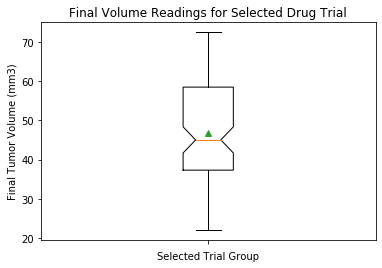

In [30]:
plt.boxplot(vol_readings, notch=True, showcaps=True, showfliers=True, showmeans=True)
plt.title('Final Volume Readings for Selected Drug Trial')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Selected Trial Group')
#Remove default x tick by replacing it with nothing
plt.xticks([1], [''])
plt.savefig('Plots/BoxPlot.png')

## Line and scatter plots

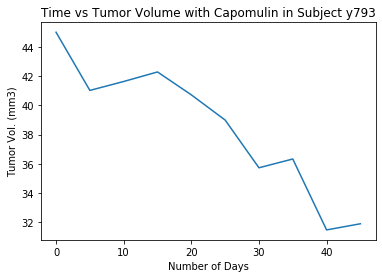

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capo_samp = merged_bestfinalvol.loc[merged_bestfinalvol['Mouse ID'] == 'y793']
Capo_samp
days = Capo_samp['Timepoint']
vols = Capo_samp['Tumor Volume (mm3)']
plt.plot(days, vols)
plt.title('Time vs Tumor Volume with Capomulin in Subject y793')
plt.xlabel('Number of Days')
plt.ylabel('Tumor Vol. (mm3)')
plt.savefig('Plots/LinePlot.png')

Text(0.5, 1.0, 'Weight vs. Tumor Volume with Capomulin')

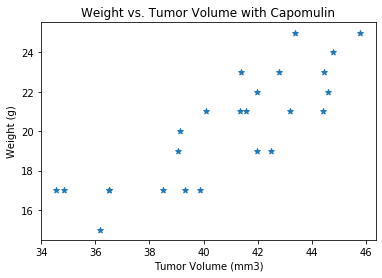

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_group = merged_bestfinalvol.loc[merged_bestfinalvol['Drug Regimen'] == 'Capomulin']
Capo_group
grouped_Capo = Capo_group.groupby('Mouse ID')
grouped_Capo_vol_avg = grouped_Capo['Tumor Volume (mm3)'].mean()
grouped_Capo_vol_avg
grouped_Capo_wt_avg = grouped_Capo['Weight (g)'].mean()
grouped_Capo_wt_avg
Capo_scatter_df = pd.merge(grouped_Capo_vol_avg, grouped_Capo_wt_avg, on='Mouse ID')
Capo_scatter_df
vol = Capo_scatter_df['Tumor Volume (mm3)']
wt = Capo_scatter_df['Weight (g)']
plt.scatter(vol, wt, marker='*')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Weight vs. Tumor Volume with Capomulin')

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(vol, wt)
print(f'Correlation coefficient: {round(corr[0], 2)}')

Correlation coefficient: 0.84


## Scatter plot with regression line

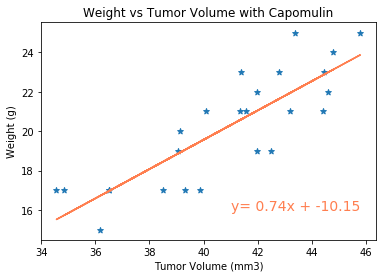

In [34]:
x_values = Capo_scatter_df['Tumor Volume (mm3)']
y_values = Capo_scatter_df['Weight (g)']
slope, intercept, rvalue, pvalue, stderr = st.linregress(vol, wt)
regress_values = (vol * slope + intercept)
line_eq = 'y= ' + (str(round(slope, 2))) + 'x + ' +(str(round(intercept, 2)))
plt.scatter(x_values, y_values, marker='*')
plt.plot(vol, regress_values, "r-", color='coral')
plt.annotate(line_eq,(41, 16), color='coral', fontsize=14)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Tumor Volume with Capomulin')
plt.savefig('Plots/ScatterRegression.png')
plt.show()